In [192]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [193]:
IMAGE_SIZE = 500
BATCH_SIZE = 33
CHANNELS = 3
EPOCHS = 50

In [194]:
df = "bean"

In [195]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    df,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 990 files belonging to 3 classes.


In [196]:
classnames = dataset.class_names
classnames

['bean_angular_leaf_spot', 'bean_healthy', 'bean_rust']

In [197]:
len(dataset)

30

In [198]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(33, 500, 500, 3)
[2 2 2 0 2 0 1 1 1 0 2 2 1 2 1 0 1 2 0 1 0 2 2 0 2 1 1 2 0 1 0 1 0]


In [199]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(500, 500, 3)


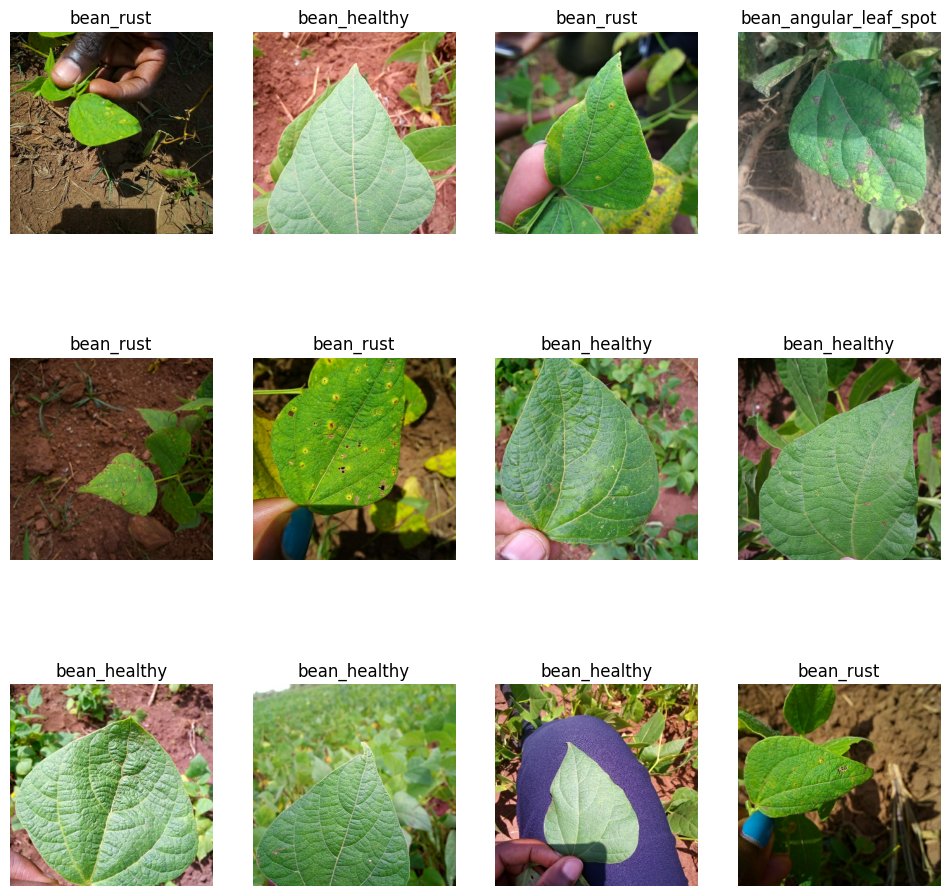

In [200]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")

In [201]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    

    return train_ds, val_ds, test_ds

In [202]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [203]:
len(train_ds)

24

In [204]:
len(val_ds)

3

In [205]:
len(test_ds)

3

In [206]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [207]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [208]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [209]:
n_classes = 3
Input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = Input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = Input_shape)

c:\Users\Kishore\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  kernel_regularizer=None,


In [210]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (33, 500, 500, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (33, 500, 500, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (33, 498, 498, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (33, 249, 249, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (33, 247, 247, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (33, 123, 123, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (33, 121, 121, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (33, 60, 60, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (33, 58, 58, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (33, 29, 29, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (33, 27, 27, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (33, 13, 13, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (33, 11, 11, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (33, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (33, 1600)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (33, 64)               │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (33, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,763 (1.03 MB)

 Trainable params: 269,763 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [211]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [212]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.3290 - loss: 1.0938 - val_accuracy: 0.5859 - val_loss: 0.9551
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5594 - loss: 0.9228 - val_accuracy: 0.4949 - val_loss: 0.9785
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5909 - loss: 0.8718 - val_accuracy: 0.5556 - val_loss: 0.9194
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6109 - loss: 0.8567 - val_accuracy: 0.6263 - val_loss: 0.7575
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6478 - loss: 0.8082 - val_accuracy: 0.6566 - val_loss: 0.8411
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6736 - loss: 0.7657 - val_accuracy: 0.6566 - val_loss: 0.7826
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6867 - loss: 0.7427 - val_accuracy: 0.6566 - val_loss: 0.9038
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6238 - loss: 0.8234 - val_accuracy: 0.6869 - val_loss:

In [213]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.9129 - loss: 0.2844


In [214]:
scores

[0.2931182384490967, 0.9090909361839294]

In [215]:
history

In [216]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 24}

In [217]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [218]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

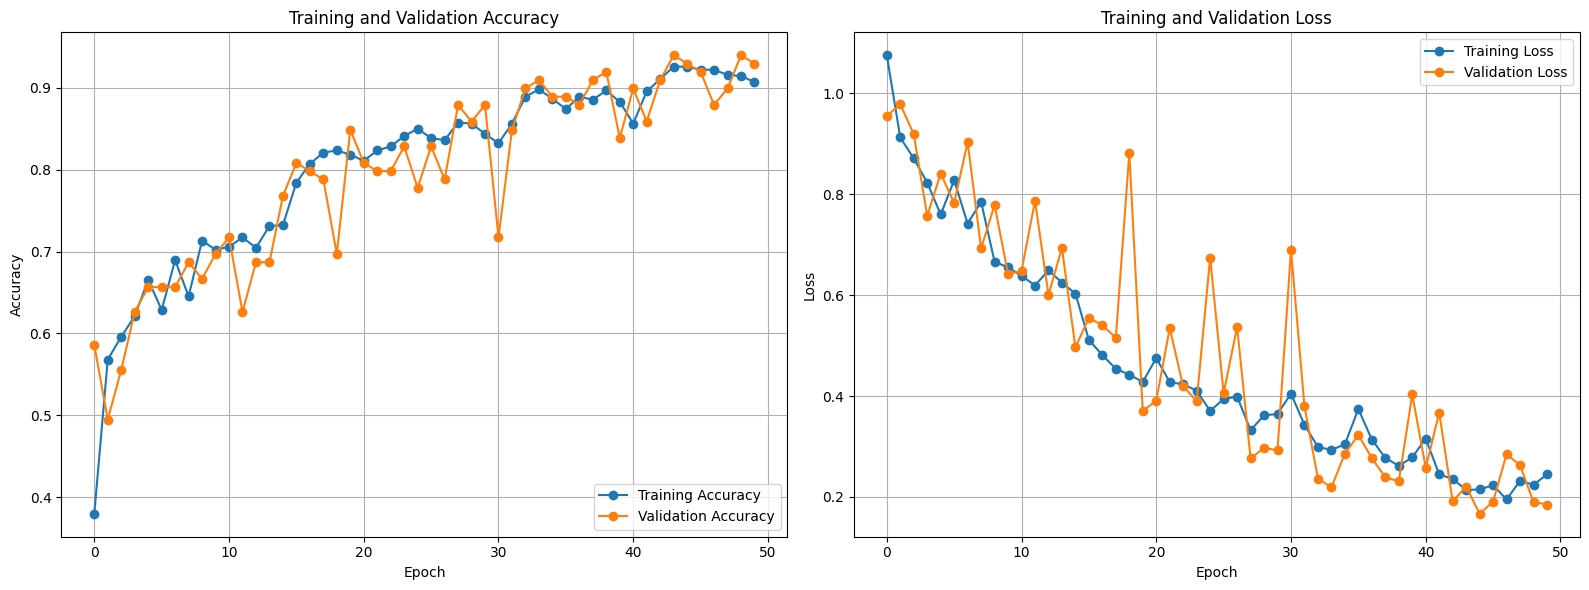

In [219]:
plt.figure(figsize=(16, 6))

# First subplot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', marker='o')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Second subplot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', marker='o')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

first image to predict
actual label: bean_healthy
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
Predicted Label: bean_healthy


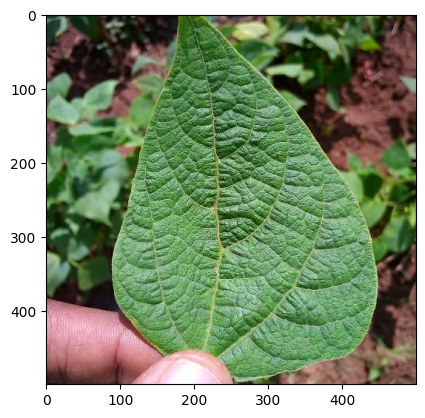

In [220]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classnames[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",classnames[np.argmax(batch_prediction[0])])

In [221]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    pred = model.predict(img_array)
    result = classnames[np.argmax(pred[0])]
    accurate = round(100 * (np.max(pred[0])), 2)
    return result, accurate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


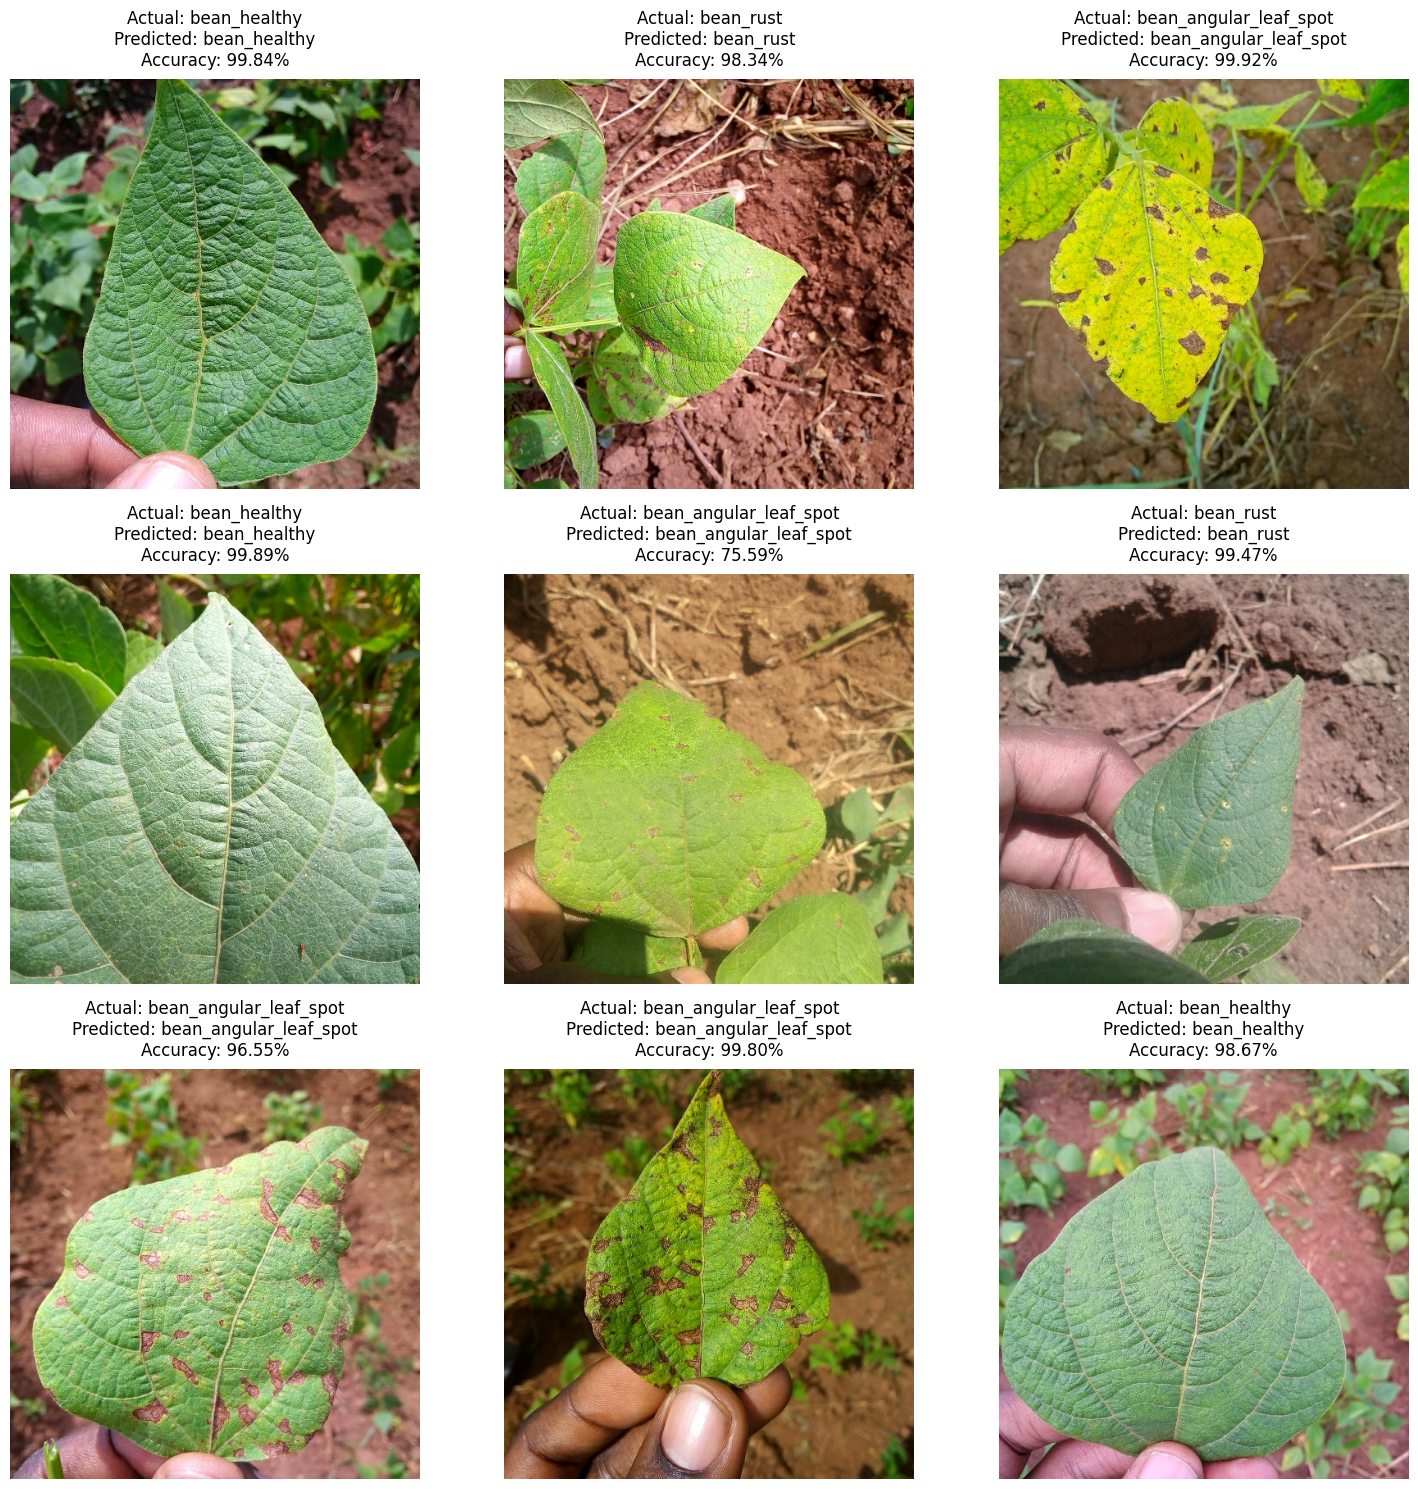

In [222]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        image = images[i].numpy().astype("uint8") 
        plt.imshow(image)
        predicted_class, confidence = predict(model, images[i])
        actual_class = classnames[labels[i].numpy()]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nAccuracy: {confidence:.2f}%", pad=10)
        plt.axis("off")
plt.tight_layout()
plt.show()

In [233]:
import os
model_version = max([int(i) for i in os.listdir("D:\\Project Files\\Leaf Disease Prediction\\Crop Disease Prediction\\Beans_disease\\models")+[0]])+1
model.save(f"D:\\Project Files\\Leaf Disease Prediction\\Crop Disease Prediction\\Beans_disease\\models\\{model_version}.keras")

ValueError: invalid literal for int() with base 10: '1.keras'